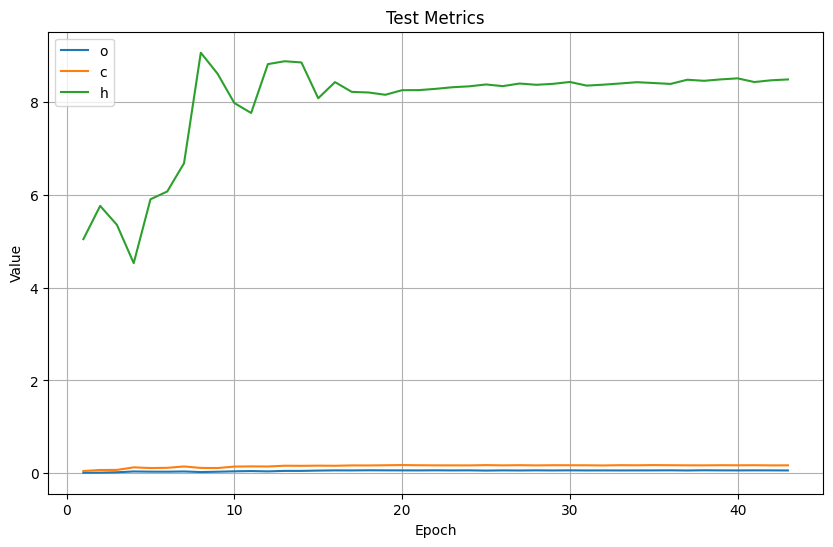

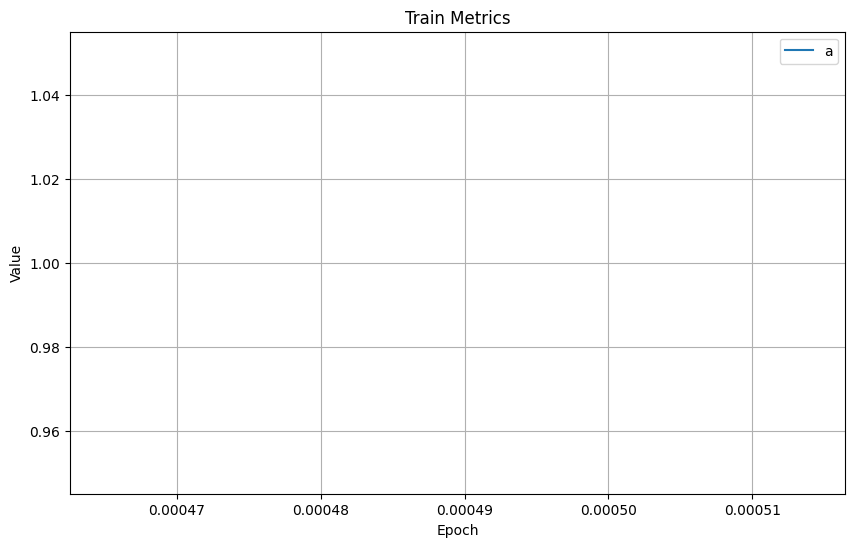

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def load_mat_file(path):
    """Load .mat file and extract data and meaning."""
    mat = loadmat(path)
    record_data = mat.get('Record_data', None)
    record_meaning = mat.get('Record_meaning', None)

    if record_data is None or record_meaning is None:
        raise ValueError(f"File {path} is missing required keys.")
    
    record_meaning = [str(x[0]) for x in record_meaning[0]]  # flatten

    return record_data, record_meaning

def plot_curves(record_data, record_meaning, title, save_path=None):
    """Plot curves from the given data."""
    plt.figure(figsize=(10, 6))
    for i in range(2, record_data.shape[1]):  # Skip epoch and iteration
        plt.plot(record_data[:, 0], record_data[:, i], label=record_meaning[i])

    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    
    if save_path:
        plt.savefig(save_path)
    plt.show()

def visualize_all_curves(record_dir, begin_epoch, max_epoch, name_suffix=""):
    """Loop through epochs and plot curves if .mat exists."""
    test_curves, train_curves = [], []

    for epoch in range(begin_epoch, max_epoch):
        test_file = os.path.join(record_dir, f'Test_{begin_epoch}_{epoch}{name_suffix}.mat')
        train_file = os.path.join(record_dir, f'Train_{begin_epoch}_{epoch}{name_suffix}.mat')
        
        if os.path.exists(test_file):
            test_data, test_labels = load_mat_file(test_file)
            test_curves.append((test_data, test_labels))

        if os.path.exists(train_file):
            train_data, train_labels = load_mat_file(train_file)
            train_curves.append((train_data, train_labels))

    # Combine all for test
    if test_curves:
        combined_test_data = np.vstack([data for data, _ in test_curves])
        plot_curves(combined_test_data, test_curves[0][1], 'Test Metrics')

    if train_curves:
        combined_train_data = np.vstack([data for data, _ in train_curves])
        plot_curves(combined_train_data, train_curves[0][1], 'Train Metrics')

if __name__ == "__main__":
    # === Modify these paths/parameters ===
    record_dir = "recorddata"  # e.g., "./logs/"
    begin_epoch = 0
    max_epoch = 64
    name_suffix = "_step1"

    visualize_all_curves(record_dir, begin_epoch, max_epoch, name_suffix)
